# Sprint 1 - EDA

**Objective:** Anomaly detection in Congress stock trades

**Author:** Tiffany Chu

**Date:** Feb 20, 2024

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

The dataset consists of combined data from Senate stock transactions, stock news events, and S&P performance metrics. It covers the period from 2020 to 2023 and contains approximately 30,000 rows and 30 relevant columns.

#### Data Dictionary

**Here is some information about the columns in the US congress trades dataset:
- transaction_date: Date of the transaction.
- owner: Owner of the asset (e.g., Senator, Spouse).
- ticker: Ticker symbol of the asset.
- asset_description: Description of the asset (e.g., company name, stock type).
- asset_type: Type of asset (e.g., Stock, Bond, Real Estate).
- type: Type of transaction (e.g., Sale (Full), Purchase, Exchange).
- amount: Amount of the transaction in USD.
- comment: Additional comments or remarks related to the transaction.
- party: Political party affiliation of the Senator.
- state: State represented by the Senator.
- industry: Industry classification of the asset.
- sector: Sector classification of the asset.
- senator: Name of the Senator associated with the transaction.
- ptr_link: URL link to the Public Financial Disclosure Report (PTR) on the Senate's website.
- disclosure_date: Date when the transaction was disclosed.

**Here is some information about the columns in the Stock news sentiment news dataset:** 
- Date: Date of the stock data.
- Open: Opening price of the stock.
- High: Highest price of the stock during the day.
- Low: Lowest price of the stock during the day.
- Close: Closing price of the stock.
- Adj Close: Adjusted closing price of the stock (accounts for dividends and stock splits).
- Volume: Volume of shares traded.
- Symbol: Ticker symbol of the stock.
- Security: Name of the company/security.
- GICS Sector: Sector classification of the company based on the Global Industry Classification Standard (GICS).
- GICS Sub-Industry: Sub-industry classification of the company based on the GICS.
- News - All News Volume: Total volume of news articles related to the company.
- News - Volume: Volume of news articles related to the company on the specific - date.
- News - Positive Sentiment: Number of news articles with positive sentiment regarding the company.
- News - Negative Sentiment: Number of news articles with negative sentiment regarding the company.
- News - New Products: Indicator for news articles related to new products.
- News - Layoffs: Indicator for news articles related to layoffs.
- News - Analyst Comments: Indicator for news articles related to analyst comments.
- News - Stocks: Indicator for news articles related to stocks.
- News - Dividends: Indicator for news articles related to dividends.
- News - Corporate Earnings: Indicator for news articles related to corporate earnings.
- News - Mergers & Acquisitions: Indicator for news articles related to mergers and acquisitions.
- News - Store Openings: Indicator for news articles related to store openings.
- News - Product Recalls: Indicator for news articles related to product recalls.
- News - Adverse Events: Indicator for news articles related to adverse events.
- News - Personnel Changes: Indicator for news articles related to personnel changes.
- News - Stock Rumors: Indicator for news articles related to stock rumors.
 

## Table of Contents

1. Wrangle, process & clean the data
2. EDA - Exploratory Data Analysis
    - summary statistics
    - plots

### Wrangle, process & clean the data

In [140]:
raw_data = pd.read_csv("house.csv")

raw_data.head() #look at dataset

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,state,ptr_link,cap_gains_over_200_usd,industry,sector,party
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,NC,https://disclosures-clerk.house.gov/public_dis...,False,Integrated oil Companies,Energy,Republican
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,NC,https://disclosures-clerk.house.gov/public_dis...,False,Integrated oil Companies,Energy,Republican
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,NC,https://disclosures-clerk.house.gov/public_dis...,False,Real Estate Investment Trusts,Real Estate,Republican
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,NC,https://disclosures-clerk.house.gov/public_dis...,False,Farming/Seeds/Milling,Consumer Non-Durables,Republican
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,CA,https://disclosures-clerk.house.gov/public_dis...,False,Investment Bankers/Brokers/Service,Finance,Democrat


change column name

In [110]:
raw_data.rename(columns={'cap_gains_over_200_usd': 'gains_over200'}, inplace=True)

In [111]:
#change date disclosure and transaction column to yyyy-mm-dd
raw_data['disclosure_date'] = pd.to_datetime(raw_data['disclosure_date'], format='%m/%d/%Y')
raw_data['transaction_date'] = pd.to_datetime(raw_data['transaction_date'], format='%Y-%m-%d', errors='coerce')

In [112]:
raw_data.shape

(17170, 16)

In [113]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17170 entries, 0 to 17169
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   disclosure_year    17170 non-null  int64         
 1   disclosure_date    17170 non-null  datetime64[ns]
 2   transaction_date   17158 non-null  datetime64[ns]
 3   owner              10524 non-null  object        
 4   ticker             17170 non-null  object        
 5   asset_description  17166 non-null  object        
 6   type               17170 non-null  object        
 7   amount             17170 non-null  object        
 8   representative     17170 non-null  object        
 9   district           17170 non-null  object        
 10  state              17170 non-null  object        
 11  ptr_link           17170 non-null  object        
 12  gains_over200      17170 non-null  bool          
 13  industry           12421 non-null  object        
 14  sector

In [115]:
(raw_data.isna().mean() * 100).round(2)

disclosure_year            0.00
disclosure_date            0.00
transaction_date           0.00
owner                     38.71
ticker                     0.00
asset_description          0.02
type                       0.00
amount                     0.00
representative             0.00
district                   0.00
state                      0.00
ptr_link                   0.00
cap_gains_over_200_usd     0.00
industry                  27.66
sector                    27.66
party                      0.50
dtype: float64

In [68]:
raw_data.isna().sum()

disclosure_year         0
disclosure_date         0
transaction_date        0
owner                6646
ticker                  0
asset_description       4
type                    0
amount                  0
representative          0
district                0
state                   0
ptr_link                0
gains_over200           0
industry             4749
sector               4749
party                  85
dtype: int64

In [69]:
raw_data['owner'].value_counts()

owner
joint        5579
self         3208
--           1315
dependent     422
Name: count, dtype: int64

In [71]:
#replace the null values in the 'owner' column with the string 'na' 
print(raw_data['owner'].isna().sum())
raw_data['owner'].fillna('na', inplace=True)
print(raw_data['owner'].isna().sum()) #check again, should be 0 after

6646


In [72]:
#replace the null values in the 'industry' column with the string 'na' 
print(raw_data['industry'].isna().sum())
raw_data['industry'].fillna('na', inplace=True)
print(raw_data['industry'].isna().sum()) #check again, should be 0 after

0


In [121]:
#since all columns with missing values are categories, change all to 'na'
raw_data.fillna('na', inplace=True)
print(raw_data.isna().sum()) #check again, should be 0 after

disclosure_year           0
disclosure_date           0
transaction_date          0
owner                     0
ticker                    0
asset_description         0
type                      0
amount                    0
representative            0
district                  0
state                     0
ptr_link                  0
cap_gains_over_200_usd    0
industry                  0
sector                    0
party                     0
dtype: int64


In [123]:
raw_data['amount'].value_counts()

amount
$1,001 - $15,000            12086
$15,001 - $50,000            2732
$50,001 - $100,000            843
$100,001 - $250,000           651
$250,001 - $500,000           295
$1,001 -                      257
$500,001 - $1,000,000         191
$1,000,001 - $5,000,000        65
$1,000,000 +                   32
$5,000,001 - $25,000,000        9
$1,000 - $15,000                4
$15,000 - $50,000               3
$50,000,000 +                   1
$1,000,000 - $5,000,000         1
Name: count, dtype: int64

In [77]:
stocknews = pd.read_csv("stock.csv")

stocknews.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,...,News - Analyst Comments,News - Stocks,News - Dividends,News - Corporate Earnings,News - Mergers & Acquisitions,News - Store Openings,News - Product Recalls,News - Adverse Events,News - Personnel Changes,News - Stock Rumors
0,2020-09-30,160.929993,163.100006,158.610001,160.179993,150.921692,3056900.0,MMM,3M,Industrials,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,160.669998,161.899994,157.720001,158.789993,149.612045,1989100.0,MMM,3M,Industrials,...,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-10-02,156.470001,161.940002,156.250000,160.360001,151.091309,1768600.0,MMM,3M,Industrials,...,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2020-10-05,162.250000,163.500000,161.759995,162.750000,153.343170,1457000.0,MMM,3M,Industrials,...,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
4,2020-10-06,163.440002,165.699997,161.830002,162.229996,152.853195,2021900.0,MMM,3M,Industrials,...,3.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0


In [27]:
print(stocknews.shape)
print(stocknews.info())

(217811, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217811 entries, 0 to 217810
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           217811 non-null  object 
 1   Open                           217811 non-null  float64
 2   High                           217811 non-null  float64
 3   Low                            217811 non-null  float64
 4   Close                          217811 non-null  float64
 5   Adj Close                      217811 non-null  float64
 6   Volume                         217811 non-null  float64
 7   Symbol                         217811 non-null  object 
 8   Security                       217811 non-null  object 
 9   GICS Sector                    217811 non-null  object 
 10  GICS Sub-Industry              217811 non-null  object 
 11  News - All News Volume         217318 non-null  float64
 12  News - Volume    

In [16]:
stocknews.isna().sum()

Date                               0
Open                               0
High                               0
Low                                0
Close                              0
Adj Close                          0
Volume                             0
Symbol                             0
Security                           0
GICS Sector                        0
GICS Sub-Industry                  0
News - All News Volume           493
News - Volume                    493
News - Positive Sentiment        493
News - Negative Sentiment        493
News - New Products              493
News - Layoffs                   493
News - Analyst Comments          493
News - Stocks                    493
News - Dividends                 493
News - Corporate Earnings        493
News - Mergers & Acquisitions    493
News - Store Openings            493
News - Product Recalls           493
News - Adverse Events            493
News - Personnel Changes         493
News - Stock Rumors              493
d

In [79]:
#remove rows that contain NaN values / columns with missing values since 
#there it means the stock change was minor and did not warrent a news event
stocknews.dropna(inplace=True)
stocknews.isna().sum()

Date                             0
Open                             0
High                             0
Low                              0
Close                            0
Adj Close                        0
Volume                           0
Symbol                           0
Security                         0
GICS Sector                      0
GICS Sub-Industry                0
News - All News Volume           0
News - Volume                    0
News - Positive Sentiment        0
News - Negative Sentiment        0
News - New Products              0
News - Layoffs                   0
News - Analyst Comments          0
News - Stocks                    0
News - Dividends                 0
News - Corporate Earnings        0
News - Mergers & Acquisitions    0
News - Store Openings            0
News - Product Recalls           0
News - Adverse Events            0
News - Personnel Changes         0
News - Stock Rumors              0
dtype: int64

In [92]:
#rid years before 2017, those are errors
raw_data.drop(index=raw_data[raw_data['transaction_date'] < pd.Timestamp('2017-01-01')].index, inplace=True)

### EDA

party
Democrat       10502
Jackson           14
Libertarian        3
Republican      6565
na                85
dtype: int64

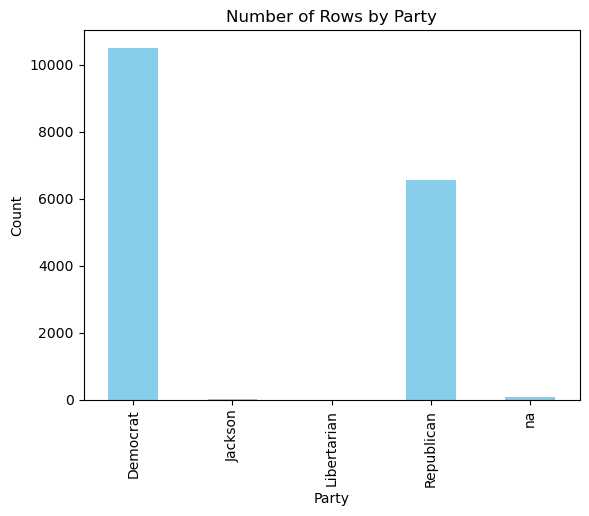

In [106]:
#bar chart showing the count of rows for each party after grouping
party_counts = raw_data.groupby('party').size()
party_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Rows by Party')
plt.xlabel('Party')
plt.ylabel('Count');

raw_data.groupby('party').size()

Text(0, 0.5, 'Count')

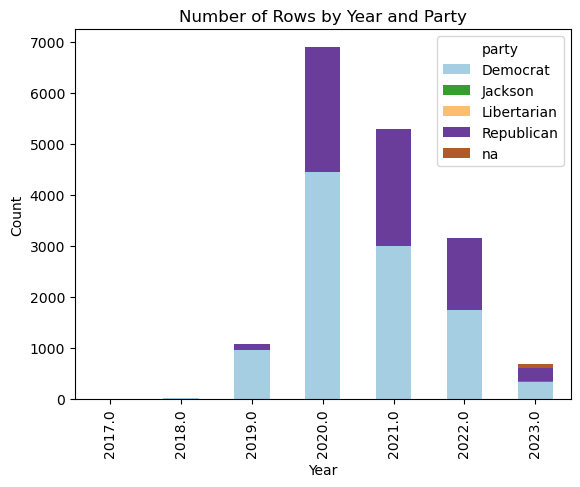

In [93]:
raw_data['year'] = raw_data['transaction_date'].dt.year

grouped_data1 = raw_data.groupby(['year', 'party']).size().unstack()
grouped_data1.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Number of Rows by Year and Party')
plt.xlabel('Year')
plt.ylabel('Count')

In [118]:
raw_data['sector'].value_counts()

sector
Technology                2527
Health Care               1625
Finance                   1449
Consumer Services         1352
Energy                     872
Consumer Discretionary     771
Capital Goods              721
Public Utilities           699
Consumer Non-Durables      487
Miscellaneous              445
Industrials                378
Basic Industries           330
Real Estate                242
Consumer Durables          170
Transportation             141
Utilities                  108
Consumer Staples            46
Basic Materials             29
Telecommunications          29
Name: count, dtype: int64

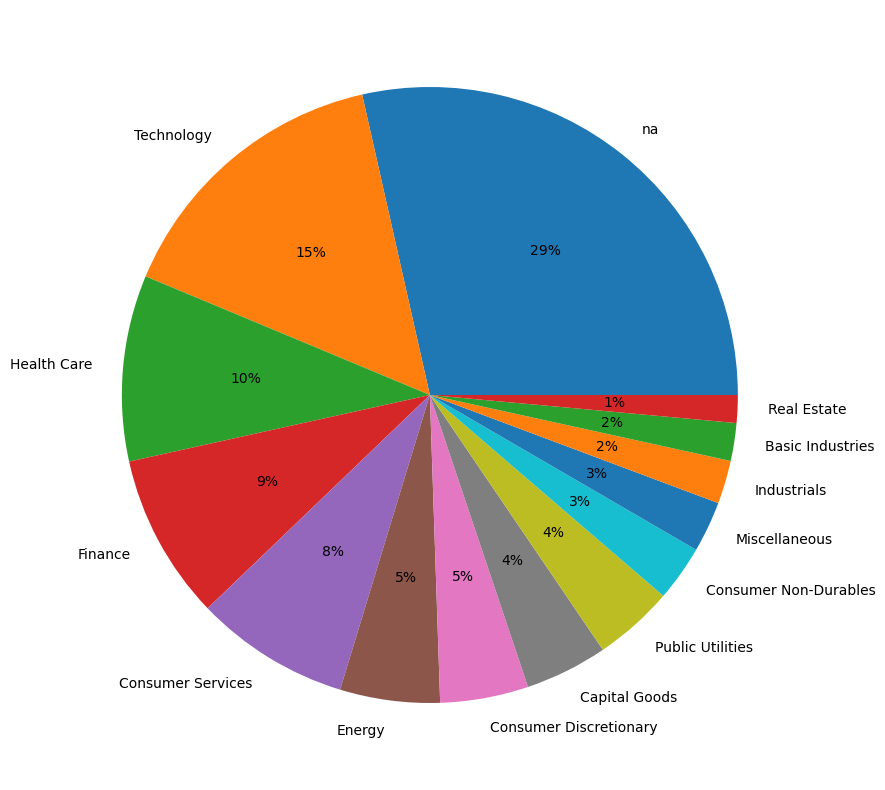

In [122]:
#pie chart showing the distribution of sectors in congress trades

sectorcounts = raw_data['sector'].value_counts()
percentages = sectorcounts / len(raw_data) * 100
sectorcounts1 = sectorcounts[percentages >= 1]
plt.figure(figsize=(10,10))  
plt.pie(sectorcounts1, labels=sectorcounts1.index, autopct='%1.f%%');

Text(0, 0.5, 'Count')

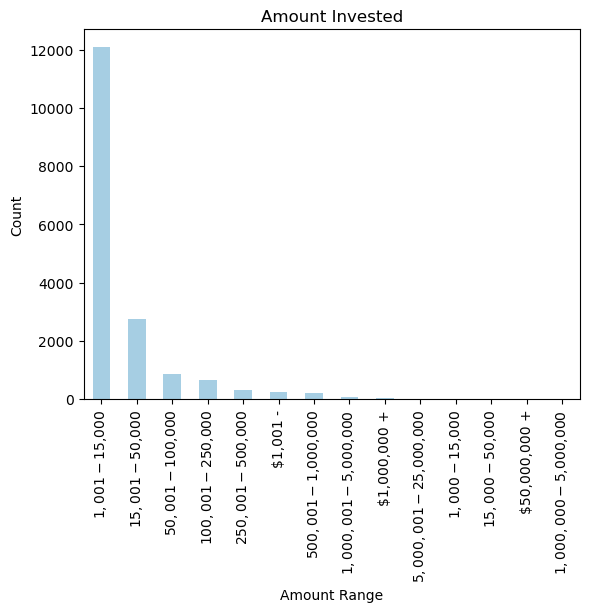

In [127]:
amt = raw_data['amount'].value_counts()

amt.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Amount Invested')
plt.xlabel('Amount Range')
plt.ylabel('Count')

In [158]:
raw_data['amount'].value_counts()

amount
$1,001 - $15,000            12086
$15,001 - $50,000            2732
$50,001 - $100,000            843
$100,001 - $250,000           651
$250,001 - $500,000           295
$1,001 -                      257
$500,001 - $1,000,000         191
$1,000,001 - $5,000,000        65
$1,000,000 +                   32
$5,000,001 - $25,000,000        9
$1,000 - $15,000                4
$15,000 - $50,000               3
$50,000,000 +                   1
$1,000,000 - $5,000,000         1
Name: count, dtype: int64

In [171]:
#adding new column for upper bound to replicate amount but in a numerical format
raw_data['upper_bound'] = raw_data['amount'].str.split(' - ').str[-1]
#using regex 
raw_data['upper_bound'] = raw_data['upper_bound'].str.replace('[^\d]', '', regex=True).astype(float)
# values like $1,000,000 +  and $50,000,000 +   become NaNs, so change to their lower bound
raw_data['upper_bound'] = raw_data['upper_bound'].fillna(raw_data['amount'].str.split(' - ').str[0])
raw_data['upper_bound'].value_counts() #double checking


upper_bound
15000.0       12090
50000.0        2735
100000.0        843
250000.0        651
500000.0        295
1001.0          257
1000000.0       223
5000000.0        66
25000000.0        9
50000000.0        1
Name: count, dtype: int64

In [173]:
# Filter the data to include only amounts over $5,000,000
filtered_data = raw_data[raw_data['upper_bound'] > 500000]

# Display the representatives with amounts over $5,000,000
print(filtered_data[['upper_bound', 'representative']].value_counts())

upper_bound  representative        
1000000.0    Suzan K. DelBene          45
             Scott H. Peters           41
             Nancy Pelosi              32
             Mark E. Green             24
5000000.0    Josh Gottheimer           21
1000000.0    Josh Gottheimer           20
5000000.0    Nancy Pelosi              19
1000000.0    Doris O. Matsui           13
             Michael T. McCaul          9
25000000.0   Suzan K. DelBene           6
5000000.0    Kevin Hern                 5
             Suzan K. DelBene           5
1000000.0    Kathy Manning              5
             Kevin Hern                 5
             Gilbert Cisneros           3
5000000.0    Scott Franklin             3
             Mark E. Green              3
1000000.0    Van Taylor                 3
             Trey Hollingsworth         3
             Brad Sherman               2
5000000.0    Kim Schrier                2
25000000.0   Josh Gottheimer            2
1000000.0    Bradley S. Schneider       

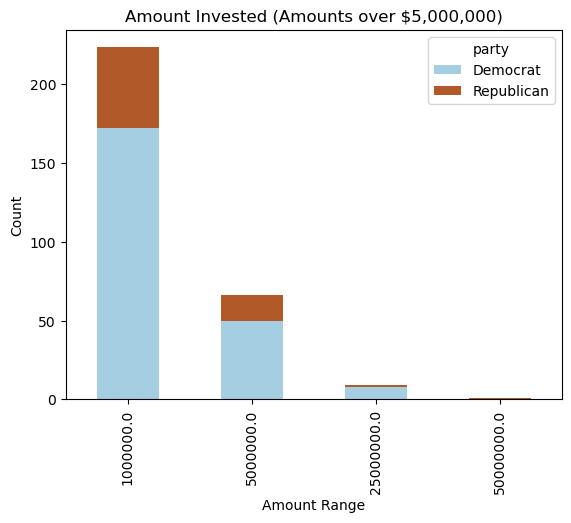

In [178]:
swag = filtered_data.groupby(['upper_bound', 'party']).size().unstack()

amt = filtered_data['amount'].value_counts()
swag.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Amount Invested (Amounts over $5,000,000)')
plt.xlabel('Amount Range')
plt.ylabel('Count')
plt.show()

In [1]:
#test test test test test